# CS 171 PS 1
# Due: Wednesday, October 9, 2019 @ 11:59pm
<font size=+1>(19/25 points)</font>

## Read *all* cells carefully and answer all parts (both text and missing code)

### Enter your information below:

<div style="color: #000000;background-color: #EEEEFF">
Your Name (submitter):Yaming Zhang<br>
Your student ID (submitter):X674002
    
<hr>

Collaborators, optional (they do *not* need to submit their own)

Collaborator 1 name:Shiyi Zhang<br>
Collaborator 1 student ID:X674358

Collaborator 2 name:<br>
Collaborator 2 student ID:

(max of 2 collaborators)
</div>


## Overview

This problem set deals with IMDB review data (from [here](https://ai.stanford.edu/~amaas/data/sentiment/)).  This dataset consists of reviews with either poor (<=4) or good (>=7) ratings.  The cells below load in training and testing data.  For each point, there are 1000 features, corresponding to the 1000 most common words in the reviews.  Each feature's value is from 0 to 6, with 0 indicating that the word did not appear, 1 indicating the word appeared once, 2 indicating the word appears between 2 and 4 times, and so on.  The corresponding y values are 0 for a poor rating and 1 for a good rating.

**We will treat these features as categorical** (That is, each feature's value is not treated as numeric, but as 7 different values that happen to be encoded using integers.)

In [6]:
## THESE ARE THE ONLY LIBRARIES YOU MAY IMPORT!!
import numpy as np
import matplotlib.pyplot as plt

# below line just to make figures larger
plt.rcParams["figure.figsize"] = (20,10)

In [7]:
def loaddata(fname):
    M = np.loadtxt(fname,dtype=float)
    np.random.shuffle(M)
    X = M[:,1:]
    threshs = [0,1,2,4,8,16,32,1024]
    for (i,(t1,t2)) in enumerate(zip(threshs[:-1],threshs[1:])):
        X[(X>t1) & (X<=t2)] = i
    Y = M[:,0]
    Y[Y<=0] = 0 # data is originally +1, -1
    return (X,Y)

In [3]:
(trainX,trainY) = loaddata('train.txt')
(testX,testY) = loaddata('test.txt')

<div style="color: #000000;background-color: #FFFFEE">
    <font size=+2>Question 1:</font> <font size=+1>(5/5 points)</font>
    
In the cell below, plot a grid of histograms (5 columns, 4 rows)
Each histogram should be the distribution of a different feature (so you will be plotting just the first 20 features).  The histograms should have two sets of bars (each in their own color): ones for examples from class 0 and one for examples from class 1.  You want side-by-side histograms, each with 7 bars (for 14 bars in two colors). Be sure to give a title to each plot with the feature number.
    
Hint: look up pyplot's [subplot](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.subplot.html) and [hist](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.hist.html) functions

</div>

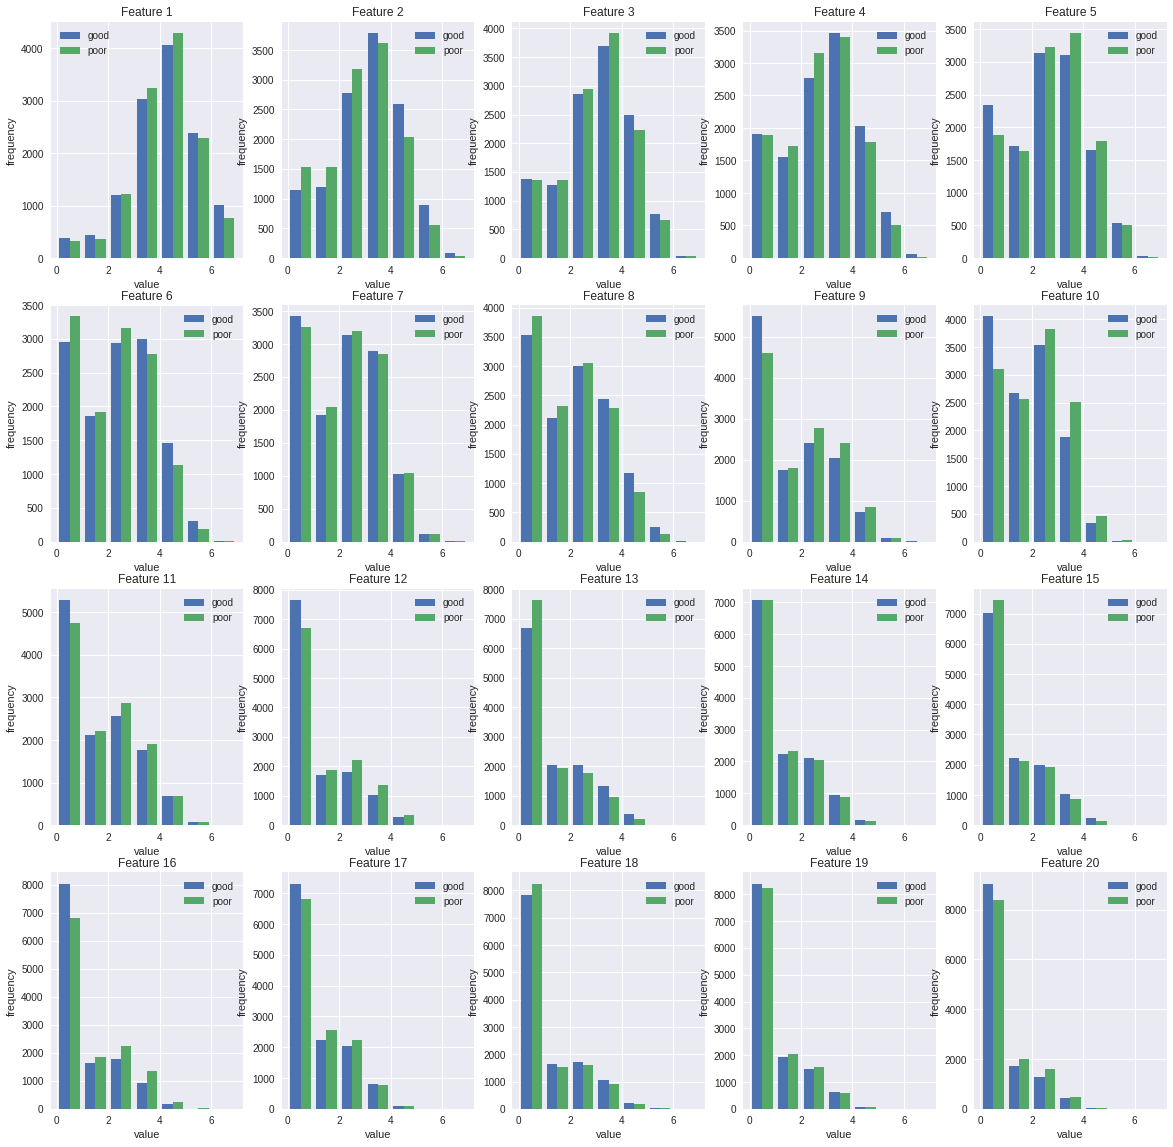

In [4]:
# YOUR CODE HERE!
plt.figure(figsize=(20, 20))
plt.style.use('seaborn')
def draw_histograms():
    for i in range(0,20):
        row1=trainY.astype(bool)
        X1=trainX[row1,i]
        row2=[False if j == True else True for j in row1]
        X2=trainX[row2,i]
        lenth = len(X1)
        X1 = X1.reshape((lenth,1))
        X2 = X2.reshape((lenth,1))
        X = np.hstack([X1, X2])
        plt.subplot(4,5,i+1)
        plt.xlabel('value')
        plt.ylabel('frequency')
#         plt.hist(x=X1,bins=np.arange(8),facecolor='r')
#         plt.hist(x=X2,bins=np.arange(8),facecolor='b')
        plt.hist(X, bins=np.arange(8),label=['good','poor'])
        plt.legend()
        plt.title("Feature "+str(i+1))
    plt.show()
draw_histograms()

<div style="color: #000000;background-color: #FFFFEE">
    <font size=+2>Question 2:</font> <font size=+1>(4/5 points)</font>

+ \- 1 point: makes the point above more precise    
    
For the 20 features above, based on the histograms you plotted, which are the most helpful three (or so) features for classifying this dataset?  <b>WHY?</b>
</div>
    

Feature 2,6,10. Because in the 3 features, the histograms of good and poor rating are the most different so that we can easily classify the dataset.

<div style="color: #000000;background-color: #FFFFEE">
    <font size=+2>Question 3:</font> <font size=+1>(8/12 points)</font>

- 4 points: calculates condp correctly
(2/4 for p(y|x) instead of p(x|y), if everything else correct)    
    
Complete the two functions in the two cells below.

The first trains/learns a naive Bayes classifier.  The second predicts the classes for a set of examples based on the model learned.
    
Hint:  Test your code on the example from the slides in class.  You'll need to generate the data matrix yourself and your own testing examples.
    
Hint 2: You will have to deal with counts that are 0.  Leaving them as zero will result in 0 probabilities that will cause problems.  A standard way to handle this is to add 1 to all counts.  For frequent feature values, it does not change things much.  For infrequent values, it keeps them away from 0 and admits that they might happen more often.
</div>

In [8]:
def learnnb(X,Y):
    # X is shape (m,n) (m data points, each with n features).  It has integer values from 0 to maxfeatval (inclusive)
    # Y is shape (m,) (m data points).  It has values of either 0 or 1 (class "0" or class "1")
    maxfeatval = X.max().max()
    
    # this function is to return a pair (priorp,condp)
    # where priorp is of shape (2,) and has the prior probability of each of the two classes
    #  and  condp is of shape (n,maxfeatval,2) and has the conditional probabilities for the naive Bayes classifier
    
    numPoint=len(X)#number of points
    numFeature=len(X[0])#number of features
    priorp1=sum(Y)/float(numPoint)#prior probability of class 1
    priorp=np.array([1-priorp1,priorp1])#priorp
    condp=np.ones((numFeature,int(maxfeatval)+1,2))#initial matrix
    for i in range(numFeature):#loop for features
        for j in range(numPoint):#loop for points
            condp[i,int(X[j,i]),int(Y[j])]+=1.0
    condp[:,:,0] = condp[:,:,0]/(numPoint-sum(Y))
    condp[:,:,1] = condp[:,:,1]/sum(Y)
    result=(priorp,condp)
    return result

In [9]:
def prednb(X,model):
    # X is of shape (m,n) (m data points, each with n features).
    # model is the pair (priorp,condp), as returned from learnnb
    # should return something of shape (m,) which is an array of 0s and 1s, indicating
    # the predicted (most probable under NB) class for each of the examples in X
    (priorp,condp) = model

    numPoint=len(X)#number of points
    numFeature=len(X[0])#number of features
    result=np.ones(numPoint)
    for i in range(numPoint):
        product1=1.0
        product0=1.0
        for j in range(numFeature):
            product0*=condp[j,int(X[i,j]),0]
            product1*=condp[j,int(X[i,j]),1]
        product0*=priorp[0]
        product1*=priorp[1]
        if product0>product1:
            result[i]=0
    return result

In [10]:
X_test = np.array([[0,1,0,1,1,1,1],[0,1,0,1,1,1,1],[1,0,0,1,1,1,1],[1,0,0,1,1,1,1]])
y_test = np.array([1,1,0,0])
p,c = learnnb(X_test, y_test)
print(p.shape)
print(c.shape)
print(p)
print(c)
p = [1/2, 1/2]
c =np.array([[[0.25, 0.75],
  [0.75, 0.25]],
 [[0.75, 0.25],
  [0.25, 0.75]],
 [[0.75, 0.75],
  [0.25, 0.25]],
 [[0.25, 0.25],
  [0.75, 0.75]],
 [[0.25, 0.25],
  [0.75, 0.75]],
 [[0.25, 0.25],
  [0.75, 0.75]],
 [[0.25, 0.25],
  [0.75, 0.75]]])
model = (p,c)
prednb(X_test, model)

(2,)
(7, 2, 2)
[0.5 0.5]
[[[0.5 1.5]
  [1.5 0.5]]

 [[1.5 0.5]
  [0.5 1.5]]

 [[1.5 1.5]
  [0.5 0.5]]

 [[0.5 0.5]
  [1.5 1.5]]

 [[0.5 0.5]
  [1.5 1.5]]

 [[0.5 0.5]
  [1.5 1.5]]

 [[0.5 0.5]
  [1.5 1.5]]]


array([1., 1., 0., 0.])

<div style="color: #000000;background-color: #FFFFEE">
<font size=+2>Question 4:</font> <font size=+1>(2/3 points)</font>
    
+ \- 1 point: compares to something more than just random chance    
    
The code below trains a naive Bayes classifier and then tests it on the testing examples and reports the error rate.
    
Run the code.  [note, just because your code runs on this example, does not mean it is correct; for instance, both classes are equally likely a priori in this example, which is not always true.]
    
Then answer the question, "<b>Is this error rate good?  How do you know?</b>"
</div>


In [7]:
def errorrate(predY,trueY):
    if len(predY.shape)>1:
        predY = predY[:,0]
    if len(trueY.shape)>1:
        trueY = trueY[:,0]
    return (predY!=trueY).mean()

model = learnnb(trainX,trainY)
predY = prednb(testX,model)
print(errorrate(predY,testY))

0.27532


I think the error rate is good, because if we guess the class of the point, the error rate is percent 50. Now, we have reduced the error rate to percent 27.532, which is more efficient for classifying.